# Hotel Reviews Dataset

Feature Extraction

In [ ]:
data_languages = pd.read_csv('output_file_with_languages.csv')
data_languages.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,...,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,reviews.text_language,reviews.title_language
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN,en,en
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN,en,en
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN,sv,fr
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN,en,en
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN,en,bn


In [ ]:
data_languages.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince', 'reviews.text_language',
       'reviews.title_language'],
      dtype='object')

In [ ]:
counts_text_language = df['reviews.text_language'].value_counts(normalize=True)* 100
print(counts_text_language)

reviews.text_language
en         93.729116
fr          1.222433
es          0.904990
de          0.698931
af          0.431611
so          0.426041
it          0.350858
pt          0.345288
no          0.236690
da          0.219982
nl          0.219982
sv          0.172644
unknown     0.169860
ca          0.150368
ro          0.111383
fi          0.077968
bn          0.075184
tl          0.064045
cs          0.061261
cy          0.047338
et          0.044553
pl          0.030630
id          0.027846
tr          0.027846
sw          0.027846
sl          0.025061
ja          0.025061
sk          0.016708
vi          0.016708
hr          0.011138
ru          0.011138
sq          0.005569
ko          0.005569
hu          0.002785
zh-cn       0.002785
lt          0.002785
Name: proportion, dtype: float64


In [ ]:
counts_title_language = df['reviews.title_language'].value_counts(normalize=True)* 100
print(counts_title_language)

reviews.title_language
en         65.841501
unknown     4.561149
af          3.826019
de          2.990644
fr          2.617509
ro          2.453219
nl          2.155268
it          1.740365
tl          1.734796
ca          1.642905
es          1.230786
so          1.228002
da          1.119403
no          1.108265
cs          0.659947
et          0.643239
fi          0.615393
pt          0.568055
id          0.467810
cy          0.439964
sv          0.370350
vi          0.311873
pl          0.297951
bn          0.284028
hu          0.206059
sl          0.164290
tr          0.136445
sk          0.122522
hr          0.122522
sw          0.116953
sq          0.086322
lt          0.083538
ja          0.022277
lv          0.022277
ko          0.005569
zh-cn       0.002785
Name: proportion, dtype: float64


In [ ]:
อย่าลืมแปลงด้วย

# **Step 1: Combining and Preprocessing 3 Datasets**
## **Datasets - Hotel Reviews**
นำเข้าชุดข้อมูลบทวิจารณ์โรงแรมมา 3 ชุดข้อมูล คือ **Hotel_Reviews.csv**, **Datafiniti_Hotel_Reviews.csv** และ **Datafiniti_Hotel_Reviews_Jun19.csv**

ชุดข้อมูลทั้ง 3 ชุดประกอบไปด้วยตัวแปรที่หลากหลาย แต่ตัวแปรบางตัวนั้นยังคงมีลักษณะที่คล้ายคลึงกัน ซึ่งพวกเราจะให้ความสนใจตัวแปรเหล่านั้นดังนี้

* reviews.rating - เป็นการให้คะแนนของผู้วิจารณ์

* reviews.title - เป็นข้อความเกริ่นนำหรือหัวข้อของบทวิจารณ์

* reviews.text - เป็นข้อความการวิจารณ์ของผู้ที่ได้เข้าพักโรงแรมในแต่ละแห่ง


URL: https://www.kaggle.com/datasets/datafiniti/hotel-reviews/data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/Data Engineering/Hotel_Reviews.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data Engineering/Datafiniti_Hotel_Reviews.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Data Engineering/Datafiniti_Hotel_Reviews_Jun19.csv')

In [25]:
df1.head(1)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN


In [30]:
df2.head(1)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com


In [17]:
df3.head(1)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...


## **1st Dataset - 7282_1.csv (Renamed to Hotel_Reviews.csv)**

### Data Transformation

In [26]:
# Drop Columns
df1 = df1.drop(['address','latitude','longitude','reviews.userCity','reviews.username',
                'reviews.userProvince','reviews.doRecommend','reviews.id','postalCode'], axis=1)

# Transformation: Date
df1['reviews.date'] = pd.to_datetime(df1['reviews.date'], utc=True)
df1['reviews.dateAdded'] = pd.to_datetime(df1['reviews.dateAdded'], utc=True)
df1['reviews.date'] = df1['reviews.date'].dt.date
df1['reviews.dateAdded'] = df1['reviews.dateAdded'].dt.date

# Sort by Review Date
df1 = df1.sort_values(by='reviews.date', ascending=True)

### Data Cleaning (Handling Outliers in Rating Column)

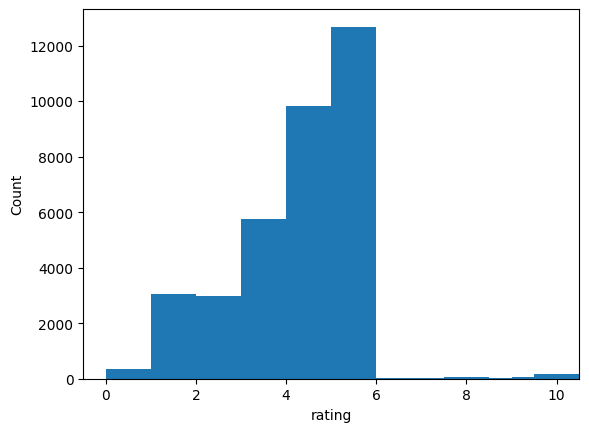

In [27]:
# Plot mean median
import matplotlib.pyplot as plt
plt.hist(df1['reviews.rating'], bins=20, width=1)
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

In [28]:
# ค่า Rating ที่เป็นไปได้
df1 = df1[df1['reviews.rating'].isin([5.0, 4.0, 3.0, 2.0, 1.0])]
df1.dropna(subset=['reviews.text','reviews.title'], inplace = True)

# เติมค่าสูญหายด้วยฐานนิยม (Mode)
df1['reviews.date'].fillna(df1['reviews.date'].mode()[0], inplace = True)

In [29]:
df1.head()

,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title
8138,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-05-16,2016-11-14,5.0,Nice City Classic Great location. We stayed an...,Great business hotel
8128,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-06-17,2016-11-14,3.0,Big fan I have stayed at The Governor on sever...,A Big disappointment!
1835,"Hotels,Hotels & Motels",Ithaca,US,Super 8 Ithaca,NY,2002-07-05,2016-12-13,4.0,Convenient Location and Price While vacationin...,Great for shot-term stay
10060,"Hotels,Lodging,Corporate Lodging",Nashville,US,Hampton Inn,TN,2002-08-01,2016-04-05,5.0,The hotel was very nice. Has a beautiful outdo...,Very nice
8130,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-09-05,2016-11-14,3.0,Perfect My girlfriend and I stayed here for ou...,A Big disappointment!


## **2nd Dataset - Datafiniti_Hotel_Reviews**

### Data Transformation

In [73]:
# Drop Columns
df2 = df2.drop(['id','dateUpdated','address','primaryCategories','keys','latitude','longitude',
                'postalCode','reviews.dateSeen','reviews.sourceURLs','reviews.userCity',
                'reviews.userProvince', 'reviews.username','sourceURLs', 'websites'], axis=1)
# Sort Columns by df1
df2 = df2.rename(columns={'dateAdded': 'reviews.dateAdded'})
new_order = ['categories', 'city', 'country', 'name', 'province', 'reviews.date', 'reviews.dateAdded', 'reviews.rating', 'reviews.text', 'reviews.title']
df2 = df2[new_order]

# Transformation: Date
df2['reviews.dateAdded'] = pd.to_datetime(df2['reviews.dateAdded'], utc=True)
df2['reviews.dateAdded'] = df2['reviews.dateAdded'].dt.date
df2['reviews.date'] = df2['reviews.date'].str.split('T').str[0]

# Sort the DataFrame by 'reviews.date' in ascending order
df2 = df2.sort_values(by='reviews.date', ascending=True)
df2.head()

,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title
2335,"Hotels,Resort,Lodging,Hotel",New Orleans,US,Omni Royal Orleans,LA,2002-07-24,2017-04-18,4.0,Found the hotel to be conveniently located and...,Enjoyed My Stay
1867,"Hotels,Casinos,Resorts,Casino,Lodging,Hotel,Re...",Las Vegas,US,Suncoast Hotel and Casino,NV,2003-02-23,2018-01-26,3.0,Stayed at the Suncoast for a week in Feb. 2003...,Who Maid the Bed
1825,"Hotels,Casinos,Resorts,Casino,Lodging,Hotel,Re...",Las Vegas,US,Suncoast Hotel and Casino,NV,2003-07-15,2018-01-26,5.0,"With the movie theater, kids babysitter facili...","What a great place for kids, exceptional offst..."
1481,"Hotels,Corporate Lodging,Lodging,Hotels-Apartm...",Anaheim,US,TownePlace Suites Anaheim Maingate Near Angel ...,CA,2004-03-01,2017-03-31,5.0,The two bedroom suites worked out very well fo...,Great family place to stay in Anaheim
9933,"Hotel,Hotel and Meeting Room,Hotels Motels",Richland,US,Courtyard Richland Columbia Point,WA,2004-06-24,2015-09-21,1.0,While the property is new and has great potent...,Don't Stay Here


### Data is already cleaned

## **3rd Dataset - Datafiniti_Hotel_Reviews_Jun19**

### Data Transformation

In [84]:
# Drop Columns
df3 = df3.drop(['id','dateUpdated','address','primaryCategories','keys','latitude','longitude',
                'postalCode','reviews.dateSeen','reviews.sourceURLs','reviews.userCity',
                'reviews.userProvince', 'reviews.username','sourceURLs', 'websites','reviews.dateAdded'], axis=1)
# Sort Columns by df1
df3 = df3.rename(columns={'dateAdded': 'reviews.dateAdded'})
new_order = ['categories', 'city', 'country', 'name', 'province', 'reviews.date', 'reviews.dateAdded', 'reviews.rating', 'reviews.text', 'reviews.title']
df3 = df3[new_order]

# Transformation: Date
df3['reviews.dateAdded'] = pd.to_datetime(df3['reviews.dateAdded'], utc=True)
df3['reviews.dateAdded'] = df3['reviews.dateAdded'].dt.date
df3['reviews.date'] = df3['reviews.date'].str.split('T').str[0]

# Sort the DataFrame by 'reviews.date' in ascending order
df3 = df3.sort_values(by='reviews.date', ascending=True)
df3.head()

,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title
1247,"Hotels,Hotels and motels,Lodging,Motels,Hotel",Chicago,US,River Hotel,IL,2003-09-01,2016-11-23,3,We stayed at Club Quarters this weekend. It wa...,Small Club
8753,"Hotels,Hotel,Hotel Pool",Atlantic City,US,The Annex at The Chelsea,NJ,2003-09-08,2016-05-15,1,I didn't expect Ceasar's Palace but also didn'...,Spend the extra money!
1569,"Budget Hotels,Lodging,Hotels Motels,Hotel",San Francisco,US,The Monarch Hotel,CA,2003-10-20,2017-09-01,4,How lovely to finally find our hotel and disco...,quite nice really...shame about the constant n...
5990,"Luxury Hotels,Hotel",Atlanta,US,JW Marriott Atlanta Buckhead,GA,2004-01-13,2017-07-18,4,Stayed at the JW to do my Christmas shopping. ...,Convenient location
1302,"Hotels Motels,Hotel",Honolulu,US,Luana Waikiki Hotel & Suites,HI,2004-03-19,2018-12-28,5,Staff were very helpful and friendly no matter...,Loved the place


### Data is already cleaned

## **Combining all 3 Datasets**

### Data Quality (Remove Duplicates)
* Save the Final Dataset after removed duplicates

In [92]:
df_combined = pd.concat([df1, df2, df3], ignore_index=True) # Combine all 3 Datasets
df_combined = df_combined.drop_duplicates() # Drop any possible duplicates
df_combined.to_csv('combined_hotel_reviews.csv', index=False) # Save the combined DataFrame to a CSV file
print("Combined DataFrame saved to 'combined_hotel_reviews.csv'")

Combined DataFrame saved to 'combined_hotel_reviews.csv'


In [93]:
df_combined

,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title
0,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-05-16,2016-11-14,5.0,Nice City Classic Great location. We stayed an...,Great business hotel
1,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-06-17,2016-11-14,3.0,Big fan I have stayed at The Governor on sever...,A Big disappointment!
2,"Hotels,Hotels & Motels",Ithaca,US,Super 8 Ithaca,NY,2002-07-05,2016-12-13,4.0,Convenient Location and Price While vacationin...,Great for shot-term stay
3,"Hotels,Lodging,Corporate Lodging",Nashville,US,Hampton Inn,TN,2002-08-01,2016-04-05,5.0,The hotel was very nice. Has a beautiful outdo...,Very nice
4,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-09-05,2016-11-14,3.0,Perfect My girlfriend and I stayed here for ou...,A Big disappointment!
...,...,...,...,...,...,...,...,...,...,...
53586,"Hotels,Corporate Lodging,Lodging,Hotels Motels...",Asheville,US,Hampton Inn Suites Asheville Biltmore Village,NC,2019-01-29,2018-01-18,5.0,The staff is extraordinarily friendly and help...,Amazing staff and facilities. HIGHLY recommend!
53587,"Travel,Hotels and motels,Resort,Hotels Motels,...",La Jolla,US,Pantai Inn,CA,2019-01-29,2017-09-01,5.0,"Lovely hotel, with lots of extras - very gener...","Peach of a hotel, across street from ocean"
53588,"Hotels,Hotels and motels,Resorts,Lodging,Hotel...",Gatlinburg,US,Margaritaville Resort Gatlinburg,TN,2019-01-29,2018-10-31,4.0,The hotel and staff were wonderful. The room w...,Great Escape
53589,"Hotels,Corporate Lodging,Lodging,Hotels Motels...",Asheville,US,Hampton Inn Suites Asheville Biltmore Village,NC,2019-01-29,2018-01-18,5.0,Very clean hotel. We booked an over-sized room...,Great Stay and close to downtown Asheville


* ลองทำการ Plot ดูการกระจายตัวของตัวแปร Rating

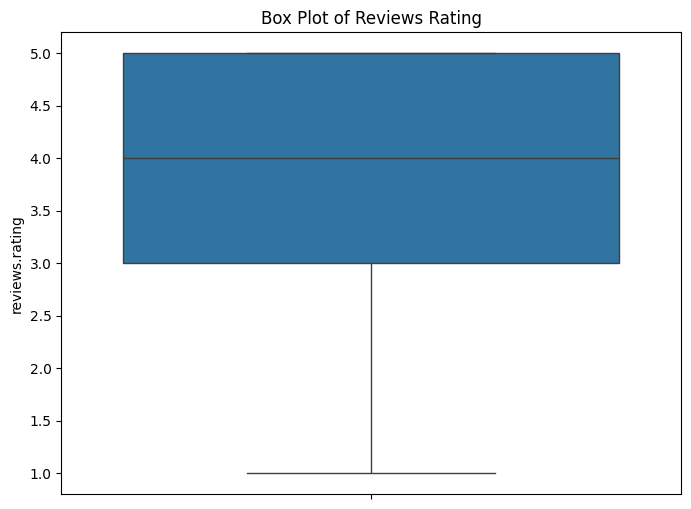

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_combined['reviews.rating'])
plt.title('Box Plot of Reviews Rating')
plt.show()

# **Step 2: Feature Extraction**
## **Combined Dataset - combined_hotel_reviews.csv**
ใช้ชุดข้อมูลบทวิจารณ์โรงแรมทั้ง 3 ชุดที่ได้ผ่านกระบวนการ Preprocessing และรวมกันเป็นหนึ่งชุดข้อมูลมาแล้ว

เพื่อทำการสกัดคุณลักษณะต่อไปดังนี้

1. สร้าง Feature ระบุภาษาของบทวิจารณ์ (review.text)
2. ทำการแปลงบทวิจารณ์ (review.text) ที่ไม่ใช่ภาษาอังกฤษ ให้เป็นภาษาอังกฤษ

URL: https://www.kaggle.com/datasets/datafiniti/hotel-reviews/data

In [100]:
data = pd.read_csv('/content/drive/MyDrive/Data Engineering/combined_hotel_reviews.csv')
data.head(2)

,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title
0,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-05-16,2016-11-14,5.0,Nice City Classic Great location. We stayed an...,Great business hotel
1,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-06-17,2016-11-14,3.0,Big fan I have stayed at The Governor on sever...,A Big disappointment!


## **(1) สร้าง Feature ระบุภาษาของบทวิจารณ์ (review.text)**
* **การตรวจจับภาษา** - Language detection for Feature: review.text

In [101]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=3fc45ee8bb42359a2efe84d05afb1248a98681eb7a3f86d97c35a127f12b19e2
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [102]:
from langdetect import detect, DetectorFactory
import langdetect

In [103]:
DetectorFactory.seed = 0 # เลือกวิธีการระบุภาษา (0 คือ ระบุตาม library ของ langdetect)

def detect_language(text):
    if isinstance(text, str) and not pd.isna(text): # ตรวจสอบว่าข้อความเป็น str และไม่ใช่ค่า NaN
        try:
            return detect(text)
        except langdetect.lang_detect_exception.LangDetectException:
            return "unknown"
    else:
        return "unknown"

# Detect language for Feature: reviews.text
data['reviews.text_language'] = data['reviews.text'].apply(detect_language)
#data['reviews.title_language'] = data['reviews.title'].apply(detect_language) กรณีที่อยากระบุภาษาของ Title

data.to_csv('hotel_reviews_languages.csv', index=False) # Save ไว้จะได้ไม่ต้องมา Run ใหม่

In [104]:
data.head(2)

,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.text_language
0,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-05-16,2016-11-14,5.0,Nice City Classic Great location. We stayed an...,Great business hotel,en
1,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-06-17,2016-11-14,3.0,Big fan I have stayed at The Governor on sever...,A Big disappointment!,en


In [106]:
data['reviews.text_language'].value_counts()

,count
reviews.text_language,
en,51059
fr,454
es,332
de,264
af,158
it,151
pt,121
no,86
da,78


* นับจำนวนบทวิจารณ์ (reviews.text) ที่ไม่ใช่ภาษาอังกฤษ

In [107]:
non_english_reviews = data[data['reviews.text_language'] != 'en']
total_non_english_reviews = len(non_english_reviews)
print(f"Total number of reviews that are not English: {total_non_english_reviews}")

Total number of reviews that are not English: 2185


## **(2) ทำการแปลงบทวิจารณ์ (review.text) ที่ไม่ใช่ภาษาอังกฤษ ให้เป็นภาษาอังกฤษ**
* **Data Transformation** - ใช้ Library googletrans เพื่อแปลงภาษาในบทวิจารณ์ (reviews.text) จาก non-English ให้เป็น English

In [108]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=1cb9858ba89c537739a570eccd8f258d2763e71dfa1b38d0dad095f59e4262af
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [109]:
from googletrans import Translator
translator = Translator() # สร้าง Translator Object

In [111]:
def translate_to_english(text): # ฟังก์ชันสำหรับการแปลงภาษาบทวิจารณ์
    if isinstance(text, str) and not pd.isna(text):
        try:
            translated = translator.translate(text, dest='en')
            return translated.text
        except:
            return text # ถ้าการแปลล้มเหลว จะคืนค่า text ต้นฉบับ
    else:
        return text

In [112]:
# เรียกใช้ฟังก์ชันการแปลงภาษาบนตัวแปร reviews.text
data['translated_reviews'] = data['reviews.text'].apply(translate_to_english)

In [113]:
data.head()

,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.text_language,translated_reviews
0,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-05-16,2016-11-14,5.0,Nice City Classic Great location. We stayed an...,Great business hotel,en,Nice City Classic Great location. We stayed an...
1,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-06-17,2016-11-14,3.0,Big fan I have stayed at The Governor on sever...,A Big disappointment!,en,Big fan I have stayed at The Governor on sever...
2,"Hotels,Hotels & Motels",Ithaca,US,Super 8 Ithaca,NY,2002-07-05,2016-12-13,4.0,Convenient Location and Price While vacationin...,Great for shot-term stay,en,Convenient Location and Price While vacationin...
3,"Hotels,Lodging,Corporate Lodging",Nashville,US,Hampton Inn,TN,2002-08-01,2016-04-05,5.0,The hotel was very nice. Has a beautiful outdo...,Very nice,en,The hotel was very nice. Has a beautiful outdo...
4,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-09-05,2016-11-14,3.0,Perfect My girlfriend and I stayed here for ou...,A Big disappointment!,en,Perfect My girlfriend and I stayed here for ou...


In [114]:
data.to_csv('hotel_reviews_translated.csv', index=False) # Save DataFrame ที่มี Feature การแปลงภาษาด้วย

# **Step 3: Training the Classification Model and Recommendation System**
## **4th Dataset - Trip Advisor Hotel Reviews**
ใช้ชุดข้อมูล Trip Advisor Hotel Reviews ในการ Train ตัวแบบการจำแนก Support Vector Machine (SVM) และตัวแบบการแนะนำ TF-IDF + Cosine Similarity (Content-Based Filtering)

ชุดข้อมูลประกอบด้วย 2 ตัวแปรได้แก่ Review และ Rating

* Review - เป็นข้อความการวิจารณ์ของผู้ที่ได้เข้าพักโรงแรมในแต่ละแห่ง

* Rating - แทนเลขจำนวนเต็มตั้งแต่ 1-5 เป็นการให้คะแนนของผู้วิจารณ์ (การให้ดาว)


URL: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews/data

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re

tripadvisor_df = pd.read_csv('/content/drive/MyDrive/Data Engineering/tripadvisor_hotel_reviews.csv')
tripadvisor_df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


### Data Preprocessing
* ทำการ Cleaning Data สำหรับข้อความในตัวแปร Review เช่น กำจัดเครื่องหมายวรรคตอน, ลบ Stopwords เป็นต้น
* ทำการ Classify Data จากตัวแปร Rating โดยถ้า Rating >= 3 จะจัดเป็นกลุ่ม Positive และ Rating < 3 จะจัดเป็นกลุ่ม Negative

In [116]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # กำจัด Punctuation
    text = text.lower()  # ทำให้ข้อความทั้งหมดเป็นตัวพิมพ์เล็ก
    return text

tripadvisor_df['cleaned_review'] = tripadvisor_df['Review'].apply(clean_text)
# การจำแนกด้วยการเข้ารหัส (label): Positive = 1 (Rating >= 3) และ Negative = -1 (Rating < 3)
tripadvisor_df['label'] = tripadvisor_df['Rating'].apply(lambda x: 1 if x >= 3 else -1)

# แยกข้อมูลเป็น Train กับ Test sets
X_train, X_test, y_train, y_test = train_test_split(tripadvisor_df['cleaned_review'],
                                                    tripadvisor_df['label'],
                                                    test_size=0.2,
                                                    random_state=42)
tfidf = TfidfVectorizer(stop_words='english') # TF-IDF Vectorization
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
tripadvisor_df.head()

,Review,Rating,cleaned_review,label
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,-1
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4 experience hotel monaco seatt...,1
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,1
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,1


### Classification Model (SVM) Training
* ทำการ Train ตัวแบบการจำแนก Support Vector Machine

In [117]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_tfidf, y_train)
y_pred_svm = svm_clf.predict(X_test_tfidf) # ทำนายผลบน Test set
print("SVM Classification Results:\n", classification_report(y_test, y_pred_svm))

SVM Classification Results:
               precision    recall  f1-score   support

          -1       0.85      0.68      0.75       625
           1       0.94      0.98      0.96      3474

    accuracy                           0.93      4099
   macro avg       0.89      0.83      0.86      4099
weighted avg       0.93      0.93      0.93      4099



### Recommendation System (TF-IDF + Cosine Similarity) Training

#### **Keyword Function**

In [121]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [122]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [123]:
def extract_keywords(text): # Extracts keywords from a text using NLTK.
    # The input text (str)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    keywords = [word for word in tokens if word.isalnum() and word not in stop_words]
    return keywords # A list of extracted keywords.

#### **Recommend Hotel from a Keyword**
  
  * ฟังก์ชันสำหรับการหาบทวิจารณ์ที่ใกล้เคียงกันมากที่สุด

In [130]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

tfidf_matrix = tfidf.fit_transform(tripadvisor_df['cleaned_review']) # Fit TF-IDF บนตัวแปร Review

In [131]:
def recommend_hotel(input_review, n_recommendations=5):
    input_review_cleaned = clean_text(input_review)
    input_review_tfidf = tfidf.transform([input_review_cleaned])
    input_keywords = extract_keywords(input_review_cleaned)

    # หา Cosine Similarity
    cosine_sim = cosine_similarity(input_review_tfidf, tfidf_matrix).flatten()
    keyword_scores = [len(set(input_keywords) & set(extract_keywords(review))) for review in tripadvisor_df['cleaned_review']]
    keyword_scores = np.array(keyword_scores) # แปลง keyword_scores ให้เป็น NumPy array

    # ปรับค่าถ่วงน้ำหนักตามที่ต้องการ
    combined_scores = 0.7 * cosine_sim + 0.3 * keyword_scores

    # ผลลัพธ์การแนะนำโรงแรม n อันดับแรกที่เหมาะกับ Keyword
    similar_indices = combined_scores.argsort()[-n_recommendations:][::-1]

    return tripadvisor_df.iloc[similar_indices]

* ตัวอย่างการเรียกใช้งาน Recommendation System

In [134]:
# Input
input_review = "I want a hotel with a pool."

# Recommendation Process
recommended_hotels = recommend_hotel(input_review)
recommended_hotels = recommended_hotels[['Rating','Review']].sort_values(by=['Rating'], ascending=False)

# Output
pd.options.display.max_colwidth = None # แสดงข้อความทั้งหมด
recommended_hotels[['Rating','Review']]

,Rating,Review
19934,5,"beauty best resort hotel breath-taking, beautiful location rooms gorgeous staff warm friendly helpful atmosphere makes want stay, worth getting pool villa luxuriating spa massage, night not enough- n't want leave 5,"
10980,5,"great hotel awful pool, just got nights grand marina agree comments class hotel reasonable location, junior suite great hallway lounge dining room bedroom bathroom shower room toilets actually needed compass bearings day, wo n't need read whats good need aware pool terrible small cold, pool area shocker, sunbeds uncomfortable matresses sunbeds no umbrellas no tables finding waiter impossible, furthermore breezy unpleasant.the problem pool compounded hotels location good minutes walk beach want lay sun, stayed hotel arts thought grand marina better arts pool fractionally better beach 20 metres away.so come grand marina management sort pool area world class hotel.oh courtesy bottle water chocolate bed time thoughtfull,"
3300,4,"good hotel lots going stayed caribe hilton numerous times, good location lots things going, great pool beach scene, good service, nice room amenities.drinks expensive medella light beers 17.50, fun place spend money think later ate spanish tapas restaurant, service good, food ok prices expensive got, caribe hilton nice hotel want options beach pool restaurants shopping spa, want small quiet look,"
6110,3,"not bad, defend hotel little bit, stayed night pre-cruise exactly looking, great pool great view easy beach location, yes carpets need replaced bed shower fine, room n't ready got used beautiful clean pool access beach beach walk, want swanky hotel week room lot probably not great choice, good location relaxation pool got vacation started right, did not experience noise night staff nice,"
3467,3,"just returned long weekend just returned long girl weekend intercontinental, orginally booked el san juan reading terrible reviews changed, checked rooms no problems noon people work extremely nice, room fine city, nicely sized clean beds pretty comfortable, bathroom small seperate area mirror outlets useful, like reviews mentioned walls hear hallways issue, pool area nice little wear tear area clean, problems getting chairs lot shade n't want sun day, understand starting pool rennovation september 5th, did n't spend time beach area hotel softest sand felt waves nice calm, pool pool bar rum punch really good restaurant pool beach good lunch, word wise- drinks kind pricey, cost 46 pop drinks starts add, inclined walk street market buy bottle rum 12, ate sushi restaurant night so-so, nights went parrot club osj favorite palm el san juan door good, overall want near old san juan el san juan casino clubs n't want pay ritz prices hotel good choice,"


# **Step 4: Apply the Models on the Final Dataset**
## **Final Dataset - hotel_reviews_translated.csv**
เรียกใช้ตัวแบบการจำแนกและตัวแบบการแนะนำลงในชุดข้อมูล **hotel_reviews_translated.csv** เพื่อทำการแนะนำโรงแรมที่เหมาะสมจากความต้องการของผู้ที่อยากจะเข้าพัก

In [152]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

final_df = pd.read_csv('hotel_reviews_translated.csv')
pd.options.display.max_colwidth = 50 # Default maximum column-width
final_df.head(2)

,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.text_language,translated_reviews
0,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-05-16,2016-11-14,5.0,Nice City Classic Great location. We stayed an...,Great business hotel,en,Nice City Classic Great location. We stayed an...
1,"Corporate Lodging,Banquet Halls & Reception Fa...",Portland,US,The Governor Hotel,OR,2002-06-17,2016-11-14,3.0,Big fan I have stayed at The Governor on sever...,A Big disappointment!,en,Big fan I have stayed at The Governor on sever...


### Data Preprocessing
* ทำการ Cleaning Data สำหรับข้อความในตัวแปร translated_reviews เช่น กำจัดเครื่องหมายวรรคตอน, ลบ Stopwords เป็นต้น
* ทำการ Classify Data จากตัวแปร reviews.rating โดยถ้า reviews.rating >= 3 จะจัดเป็นกลุ่ม 1 (Positive) และ reviews.rating < 3 จะจัดเป็นกลุ่ม -1 (Negative)

In [153]:
final_df[final_df['translated_reviews'].isnull() == True]

,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.text_language,translated_reviews
35900,"Hotel,Hotels and motels",Charleston,US,Holiday Inn Express Charleston Dwtn - Ashley R...,SC,2015-06-04,2015-10-23,3.0,NaN,Review,unknown,NaN


In [154]:
# กำจัดแถวที่บทวิจารณ์มีค่าเป็น NaN
final_df.dropna(subset=['translated_reviews'], inplace=True)

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

final_df['cleaned_review'] = final_df['translated_reviews'].apply(clean_text)
final_df['label'] = final_df['reviews.rating'].apply(lambda x: 1 if x >= 3 else -1) # การจำแนกข้อมูลด้วยการแบ่งจาก Rating

### Apply the SVM Classification Model

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [156]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(final_df['cleaned_review'])
y = final_df['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf = SVC(kernel='linear') # Model Training
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test) # ทำนายบน Test Set
print("SVM Classification Results:\n", classification_report(y_test, y_pred_svm))

SVM Classification Results:
               precision    recall  f1-score   support

          -1       0.77      0.58      0.66      1701
           1       0.92      0.97      0.94      8948

    accuracy                           0.90     10649
   macro avg       0.85      0.77      0.80     10649
weighted avg       0.90      0.90      0.90     10649



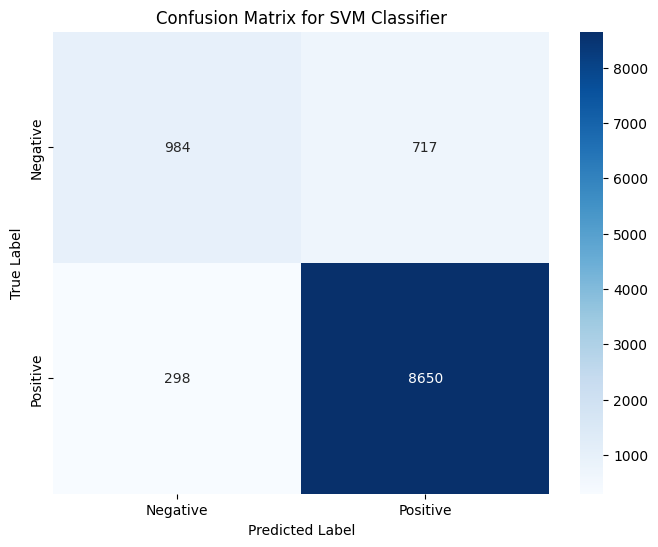

In [157]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm) # คำนวณ confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

### Apply the Recommendation System

In [158]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [159]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
def extract_keywords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    keywords = [word for word in tokens if word.isalnum() and word not in stop_words]
    return keywords

tfidf_matrix = tfidf.fit_transform(final_df['cleaned_review'])

def recommend_hotel(input_review, n_recommendations=5):
    input_review_cleaned = clean_text(input_review)
    input_review_tfidf = tfidf.transform([input_review_cleaned])
    input_keywords = extract_keywords(input_review_cleaned)

    cosine_sim = cosine_similarity(input_review_tfidf, tfidf_matrix).flatten()
    keyword_scores = [len(set(input_keywords) & set(extract_keywords(review))) for review in final_df['cleaned_review']]
    keyword_scores = np.array(keyword_scores)

    combined_scores = 0.7 * cosine_sim + 0.3 * keyword_scores

    similar_indices = combined_scores.argsort()[-n_recommendations:][::-1]
    return final_df.iloc[similar_indices]

In [161]:
# Input
input_review = "I want a hotel with a pool."

# Process
recommended_hotels = recommend_hotel(input_review)
recommended_hotels = recommended_hotels[['reviews.rating','translated_reviews']].sort_values(by=['reviews.rating'], ascending=False)

# Output
pd.options.display.max_colwidth = None
recommended_hotels[['reviews.rating','translated_reviews']]

,reviews.rating,translated_reviews
7658,5.0,The hotel itself was nice but we were disappointed because I booked this hotel because we want to use the pool and the hot tub after a long ride nice to have but they were not available Under repairs.
49765,5.0,"This is a very nice, clean and very friendly hotel. The entire staff is friendly is very helpful. Breakfast was fantastic with everything you could possibly want. The room was spotless, the pool was perfect. Great hotel, great stay, would stay again if I'm in the area."
22601,4.0,"Went with my son to go to Universal Studios. Location was great. Pool is the BEST! Rooms are adequate, clean, standard size but no fridge. Be sure to ask for one if you want one. The hotel is great for location and pool."
45219,4.0,Enjoyed staying here and having a continental breakfast. It is right across from Disney and that is perfect. Nice spacious rooms and a pool and hot tub if you want one. I was very pleased with this hotel!
4756,2.0,"We had to stay here due to the other hotel booking up, the beds were comfortable and their towels were nice and clean. Bob the manager didn't want to give you more than a few towels for the pool because he didn't have many (they didn't want you using the room towels) they were regular towels too, not like what... More"
